# Coeficientes de correlación

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
data_ads = pd.read_csv(r'F:\BD\GitHub\mlearningcourse\datasets\ads\Advertising.csv')

In [89]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [78]:
data_ads.describe()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500,25.811685,471.936784,27.085744
std,85.854236,14.846809,21.778621,5.217457,123.000804,763.402048,34.039001
min,0.700000,0.000000,0.300000,1.600000,-313.207835,0.021316,0.000506
25%,74.375000,9.975000,12.750000,10.375000,-21.504097,63.199516,3.525006
50%,149.750000,22.900000,25.750000,12.900000,14.161440,267.453316,12.960506
75%,218.825000,36.525000,45.100000,17.400000,64.364827,588.286516,37.242381
max,296.400000,49.600000,114.000000,27.000000,687.808015,6963.234916,168.415506


In [17]:
len(data_ads)

200

## Función de correlación (creada)

In [27]:
def corr_coeff(df,var1,var2):
    df['corrn'] = (df[var1] -np.mean(df[var1])) * (df[var2]-np.mean(df[var2]))
    df['corr1'] = (df[var1] -np.mean(df[var1])) **2
    df['corr2'] = (df[var2] -np.mean(df[var2])) **2
    corr_p= sum(df['corrn'])/ np.sqrt(sum(df['corr1']) * sum(df['corr2']))
    return corr_p

In [28]:
corr_coeff(data_ads, 'TV', 'Sales')

0.782224424861606

In [54]:
#Una manera de encontrar la correlación
publicidad = ['TV','Radio','Newspaper']
variable_independiente = ['Sales']

contador = 0
while contador <3:
    coeficiente = corr_coeff(data_ads, publicidad[contador],'Sales')
    print ("Coeficiente de correlación en " + publicidad[contador])
    print (coeficiente)
    contador += 1   


Coeficiente de correlación en TV
0.782224424861606
Coeficiente de correlación en Radio
0.5762225745710553
Coeficiente de correlación en Newspaper
0.22829902637616525


In [52]:
cols = data_ads.columns.values

In [53]:
# Otra manera de encontrar la correlación
for x in cols: 
    for y in cols:
        print (x +','+y +':'+ str(corr_coeff(data_ads, x, y )))

TV,TV:1.0
TV,Radio:0.05480866446583009
TV,Newspaper:0.056647874965056993
TV,Sales:0.782224424861606
Radio,TV:0.05480866446583009
Radio,Radio:1.0
Radio,Newspaper:0.3541037507611752
Radio,Sales:0.5762225745710553
Newspaper,TV:0.056647874965056993
Newspaper,Radio:0.3541037507611752
Newspaper,Newspaper:1.0
Newspaper,Sales:0.22829902637616525
Sales,TV:0.782224424861606
Sales,Radio:0.5762225745710553
Sales,Newspaper:0.22829902637616525
Sales,Sales:1.0


Text(0, 0.5, 'Sales')

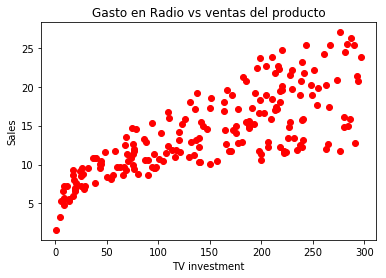

In [80]:
plt.plot(data_ads['TV'], data_ads['Sales'], 'ro')
plt.title('Gasto en TV vs ventas del producto')
plt.title('Gasto en Radio vs ventas del producto')
plt.xlabel('TV investment')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

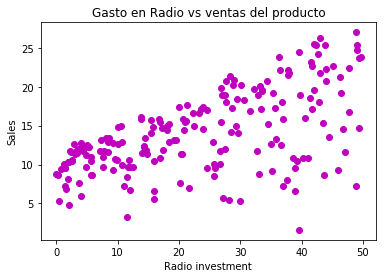

In [86]:
plt.plot(data_ads['Radio'], data_ads['Sales'], 'mo') #magenta
plt.title('Gasto en Radio vs ventas del producto')
plt.xlabel('Radio investment')
plt.ylabel('Sales')

Text(0, 0.5, 'Sales')

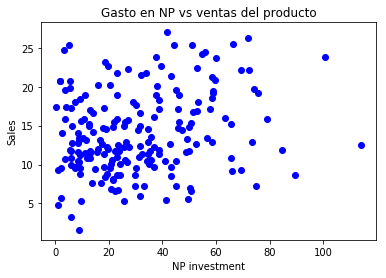

In [91]:
plt.plot(data_ads['Newspaper'], data_ads['Sales'], 'bo')
plt.title('Gasto en NP vs ventas del producto')
plt.xlabel('NP investment')
plt.ylabel('Sales')

## Correlación directa con pandas

In [90]:
#Matriz de correlación
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [98]:
#Gráfico de correlación
import matplotlib.pyplot as plt

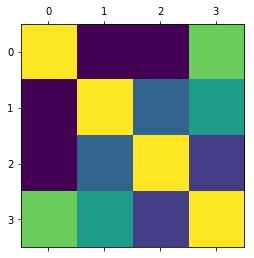

In [99]:
plt.matshow(data_ads.corr())